In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 4-Connected Neighbors (N4)

In [2]:
def N4(image, x, y):
    neighbors = []
    height, width = image.shape

    if x > 0:
        neighbors.append(image[x - 1, y])  # Pixel above
    if x < height - 1:
        neighbors.append(image[x + 1, y])  # Pixel below
    if y > 0:
        neighbors.append(image[x, y - 1])  # Pixel to the left
    if y < width - 1:
        neighbors.append(image[x, y + 1])  # Pixel to the right

    return neighbors


# 8-Connected Neighbors (N8)

In [3]:
def N8(image, x, y):
    neighbors = N4(image, x, y)
    height, width = image.shape

    if x > 0 and y > 0:
        neighbors.append(image[x - 1, y - 1])  # Pixel top-left
    if x > 0 and y < width - 1:
        neighbors.append(image[x - 1, y + 1])  # Pixel top-right
    if x < height - 1 and y > 0:
        neighbors.append(image[x + 1, y - 1])  # Pixel bottom-left
    if x < height - 1 and y < width - 1:
        neighbors.append(image[x + 1, y + 1])  # Pixel bottom-right

    return neighbors


In [4]:
image = np.array([
    [10, 20, 30],
    [40, 50, 60],
    [70, 80, 90]
])

x_coord, y_coord = 1, 1
neighbors_N4 = N4(image, x_coord, y_coord)
neighbors_N8 = N8(image, x_coord, y_coord)

print("4-Connected Neighbors:", neighbors_N4)
print("8-Connected Neighbors:", neighbors_N8)

4-Connected Neighbors: [20, 80, 40, 60]
8-Connected Neighbors: [20, 80, 40, 60, 10, 30, 70, 90]


# Connected pixels that share the same value or characteristics

In [18]:
import numpy as np

# Given matrix
image = np.array([
    [10, 20, 30],
    [40, 50, 60],
    [70, 80, 90]
])

# Function to perform depth-first search to find connected component
def find_connected_component(matrix, start, goal, v):
    height, width = matrix.shape

    def dfs(x, y, visited):
        # Check if current coordinates are within bounds and have the desired value
        if 0 <= x < height and 0 <= y < width and matrix[x, y] in v and (x, y) not in visited:
            if (x, y) == goal:
                return True  # Reached the goal

            visited.add((x, y))  # Mark the current node as visited

            # Explore neighbors (up, down, left, right)
            if dfs(x - 1, y, visited) or dfs(x + 1, y, visited) or dfs(x, y - 1, visited) or dfs(x, y + 1, visited):
                return True  # Goal found among neighbors

        return False

    # Starting coordinates
    start_x, start_y = start

    # Perform depth-first search from the starting point
    if dfs(start_x, start_y, set()):
        print(f"Connected component from {start} to {goal} exists.")
    else:
        print(f"No connected component from {start} to {goal}.")

# Find connected component from start=[0,0] to goal=[2,2] with v=[40,50]
find_connected_component(image, (0, 0), (2, 2), [40, 50])


No connected component from (0, 0) to (2, 2).


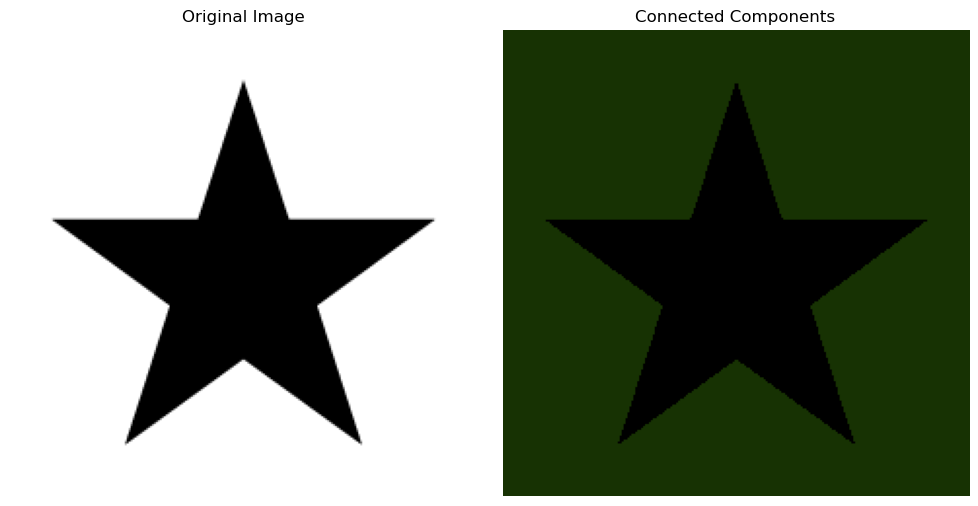

In [9]:


# Read the image as a grayscale image
image = cv2.imread('image2.png', cv2.IMREAD_GRAYSCALE)

# Apply thresholding to convert the image to a binary image (if needed)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find connected components
num_labels, labels = cv2.connectedComponents(binary_image)

# Create a random color map for visualization
colors = np.random.randint(0, 255, size=(num_labels, 3))

# Create an output image with colored components
output = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

for label in range(1, num_labels):
    label_mask = labels == label
    output[label_mask] = colors[label]

# Display the original and labeled images using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(output)
plt.title('Connected Components')
plt.axis('off')

plt.tight_layout()
plt.show()


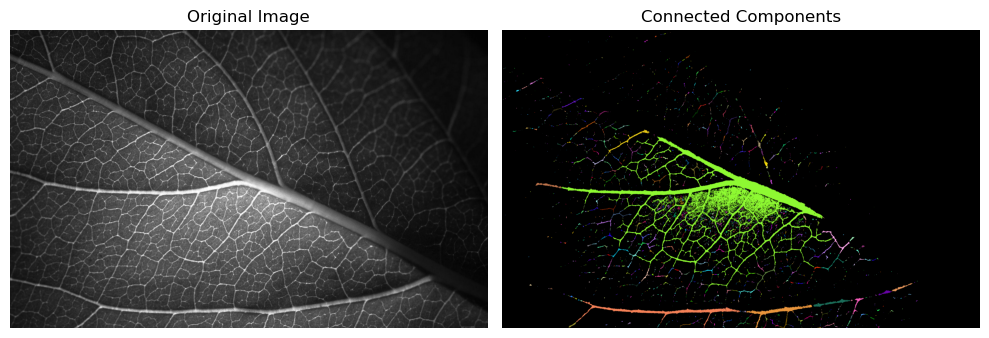

In [7]:


# Read the image as a grayscale image
image = cv2.imread('Grayscale_Image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding to convert the image to a binary image (if needed)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find connected components
num_labels, labels = cv2.connectedComponents(binary_image)

# Create a random color map for visualization
colors = np.random.randint(0, 255, size=(num_labels, 3))

# Create an output image with colored components
output = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

for label in range(1, num_labels):
    label_mask = labels == label
    output[label_mask] = colors[label]

# Display the original and labeled images using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(output)
plt.title('Connected Components')
plt.axis('off')

plt.tight_layout()
plt.show()
